**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Erick Fernando Holguin Pardavell
*   MATRÍCULA: A01797412

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
DIR = "/content/"
os.chdir(DIR)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [8]:
print('---'*50)
print('Determinar el numero de variables numericas y de texto')
types = response_df.info(show_counts=False, memory_usage=False)
print(types)

columnas_numericas = response_df.select_dtypes(include=['int64','float'])
conteo_numericas = columnas_numericas.describe().loc['count']


columnas_texto = response_df.select_dtypes(include='object')
conteo_texto = columnas_texto.describe().loc['count']


print('---'*50)
print('Columnas numericas, (solo se incluye el conteo para que sea mas legible)')
print(conteo_numericas)

print('---'*50)
print('Columnas de texto, (solo se incluye el conteo para que sea mas legible)')
print(conteo_texto)

------------------------------------------------------------------------------------------------------------------------------------------------------
Determinar el numero de variables numericas y de texto
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)None
------------------------------------------------------------------------------------------------------------------------------------------------------
Columnas numericas, (solo se incluye el conteo para que sea mas legible)
Music                         1007.0
Slow songs or fast songs      1008.0
Dance                         1006.0
Folk                          1005.0
Country                       1005.0
                               ...  
Spending on healthy eating    1008.0
Age                           1003.0
Height                         990.0
Weight                         990.0
Number of siblings       

2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


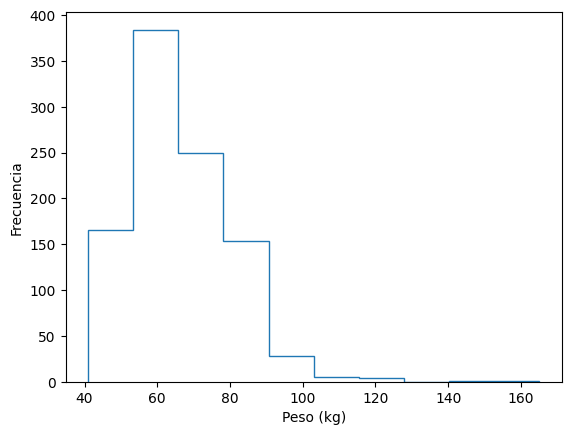

Fundamento: Es más fácil de interpretar usando un gráfico de tipo histograma cuando son muchos valores


In [9]:
response_df.Weight.plot.hist(histtype='step', ylabel='Frecuencia', xlabel='Peso (kg)')
plt.show()
fundamento = 'Fundamento: Es más fácil de interpretar usando un gráfico de tipo histograma cuando son muchos valores'
print(fundamento)

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [10]:
asimetria = response_df['Weight'].skew()

print(f"\nEl sesgo (asimetria) de la distribución de peso es: {asimetria:.3f}")

if asimetria > 0:
    print("\nAsimetria: Positiva (sesgo a la derecha).")
    print("La mayoría de los valores se concentran en el lado izquierdo de la media.")
elif asimetria < 0:
    print("\nAsimetria: Negativa (sesgo a la izquierda).")
    print("La mayoría de los valores se concentran en el lado derecho de la media.")


El sesgo (asimetria) de la distribución de peso es: 1.224

Asimetria: Positiva (sesgo a la derecha).
La mayoría de los valores se concentran en el lado izquierdo de la media.


4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [11]:
faltantes_peso = response_df['Weight'].isnull().sum()
total_peso = len(response_df['Weight'])
missing_weight_percentage = (faltantes_peso / total_peso) * 100

print(f"Valores faltantes en 'Weight': {faltantes_peso}")
print(f"Porcentaje de valores faltantes: {missing_weight_percentage:.2f}%")

Valores faltantes en 'Weight': 20
Porcentaje de valores faltantes: 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [12]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'Con valores faltantes', False:'Sin valores faltantes'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [13]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'Con valores faltantes', False:'Sin valores faltantes'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

------------------------------------------------------------------------------------------------------------------------------------------------------
Analisis NUMERICO de valores faltantes para Age:


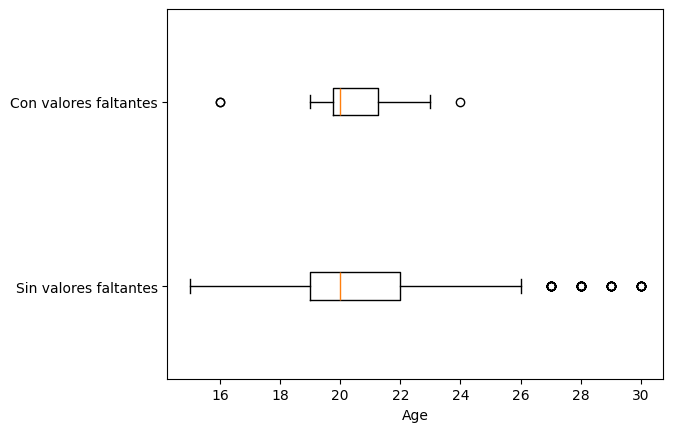

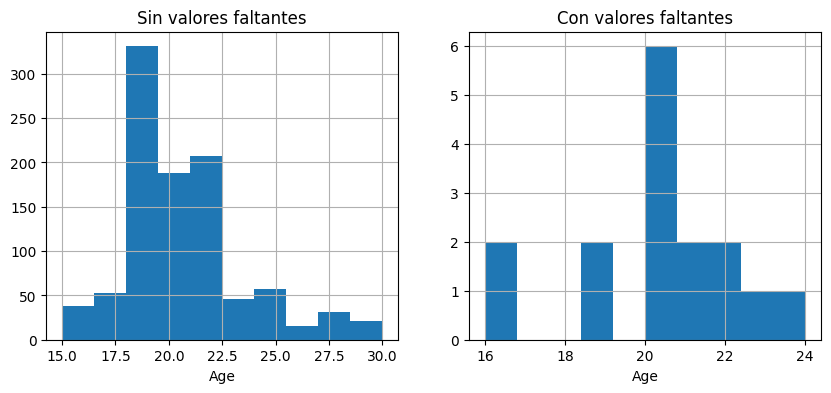

p-value of t-test: 0.7258243979822129
------------------------------------------------------------------------------------------------------------------------------------------------------
Analisis NUMERICO de valores faltantes para Number of siblings:


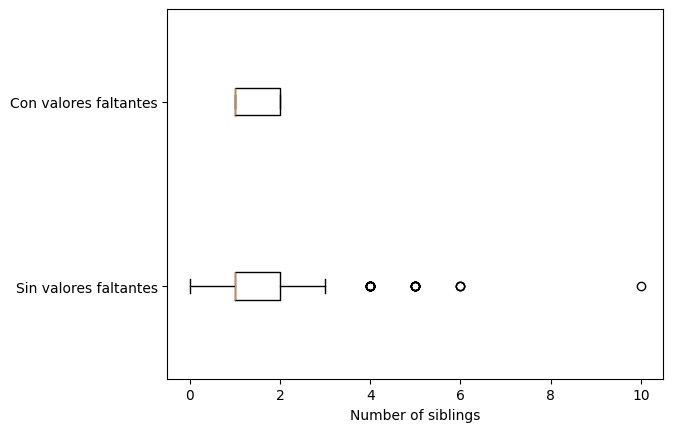

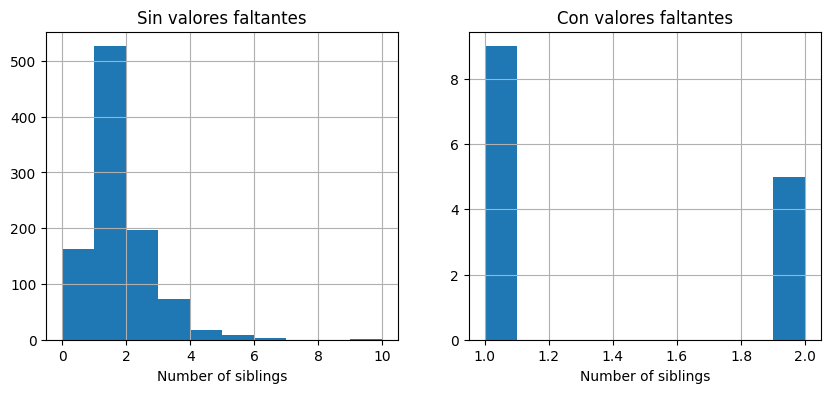

p-value of t-test: 0.8255092107556896
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Analisis CATEGORICO de valores faltantes para Gender:


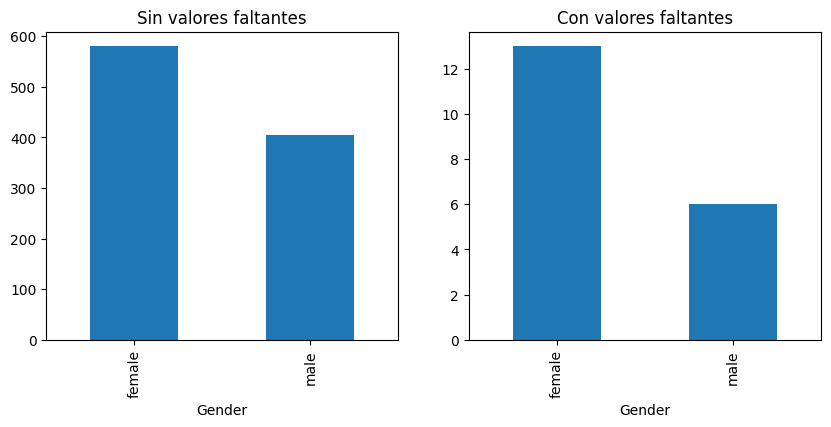

p-value of Chi_squared test: 0.5472167199163878
------------------------------------------------------------------------------------------------------------------------------------------------------
Analisis CATEGORICO de valores faltantes para Education:


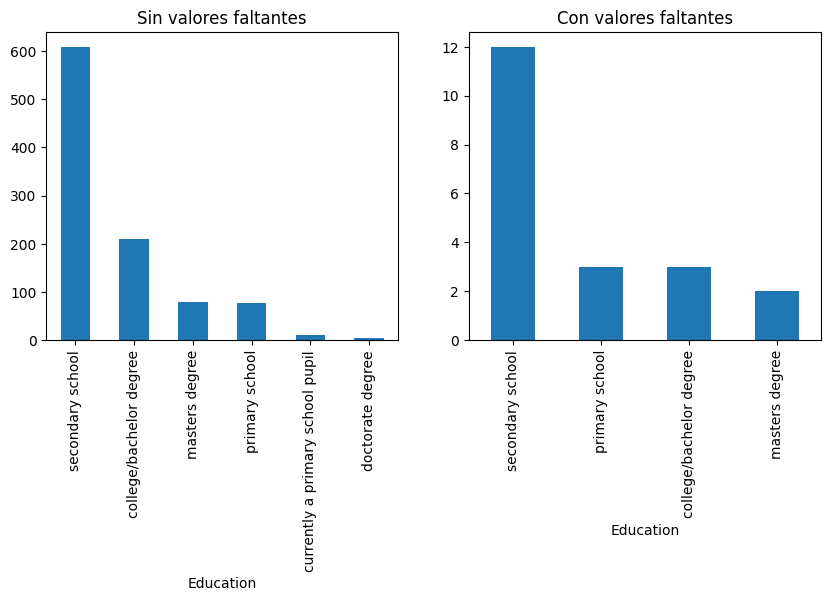

p-value of Chi_squared test: 0.8424822989541867
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
CONCLUSION NUMERICO
Age: Se identificó que la edad se concentra mas entre 22 y 24 en los valores faltantes en el campo peso
Number of siblings: Se identificó valores 1 y 2 cuando hay valores faltantes el peso
CONCLUSION CATEGORICO
Gender: Se identificó que aunque el genero sea femenino o masculino no afecta al hecho que haya valores faltantes en el campo peso se mantiene la misma tendencia
Education: Se identificó cuando hay valores faltantes la escolaridad bachelor disminuye y la escolaridad primary school aumenta


In [14]:
numerical_attributes = ['Age', 'Number of siblings']

BM_MV = response_df.Weight.isna()
for att in numerical_attributes:
    print('---'*50)
    print('Analisis NUMERICO de valores faltantes para {}:'.format(att))
    Diagnose_MV_Numerical(response_df, att, BM_MV)


print('---'*50)
print('---'*50)

categorical_attributes = ['Gender', 'Education']

BM_MV = response_df.Weight.isna()
for att in categorical_attributes:
    print('---'*50)
    print('Analisis CATEGORICO de valores faltantes para {}:'.format(att))
    Diagnose_MV_Categorical(response_df, att, BM_MV)


print('---'*50)
print('---'*50)
print('CONCLUSION NUMERICO')
print('Age: Se identificó que la edad se concentra mas entre 22 y 24 en los valores faltantes en el campo peso')
print('Number of siblings: Se identificó valores 1 y 2 cuando hay valores faltantes el peso')

print('CONCLUSION CATEGORICO')
print('Gender: Se identificó que aunque el genero sea femenino o masculino no afecta al hecho que haya valores faltantes en el campo peso se mantiene la misma tendencia')
print('Education: Se identificó cuando hay valores faltantes la escolaridad bachelor disminuye y la escolaridad primary school aumenta')


6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

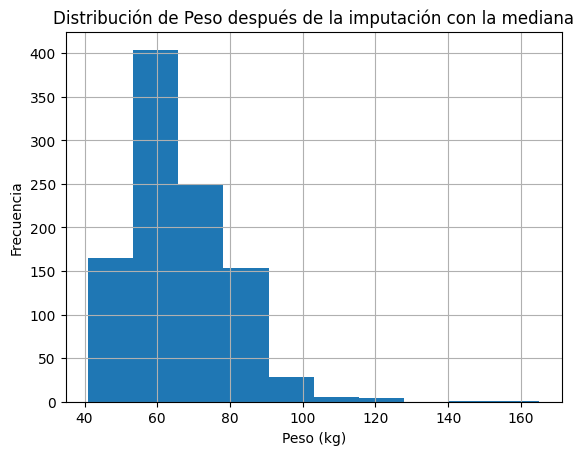


El sesgo de la distribución de peso después de la imputación es: 1.245


In [35]:
# se calcula la mediana de la columna Weight para rellenar esos valores vacios
median_weight = response_df['Weight'].median()
response_df['Weight'].fillna(median_weight, inplace=True)

# se prepara un histograma para mostrar la informacion
response_df.Weight.plot.hist(ylabel='Frecuencia', grid=True, xlabel='Peso (kg)')
plt.title('Distribución de Peso después de la imputación con la mediana')
plt.show()



7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

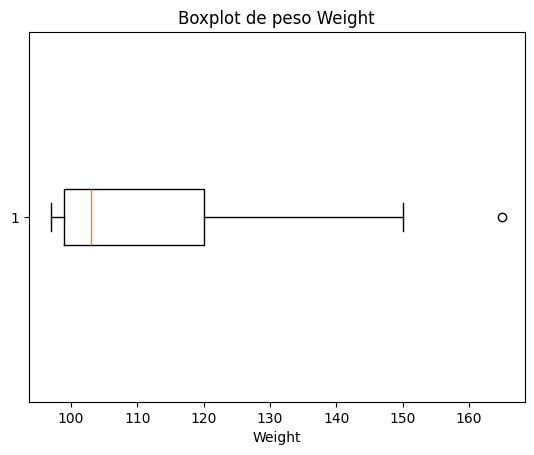

Numero de valores atípicos en 'Weight': 21
Numero de registros despues de eliminar los valores atípicos: 989


In [23]:
#se obtiene la media
median = response_df['Weight'].mean()

# se obtiene el rango minimo y maximo aceptable
Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = median - 1.5 * IQR
upper_bound = median + 1.5 * IQR

# se identifican los valores atipicos
outliers = response_df[(response_df['Weight'] < lower_bound) | (response_df['Weight'] > upper_bound)].copy()

# se prepara la gráfica Boxplot
plt.boxplot(outliers.Weight.dropna(),vert=False)
plt.xlabel('Weight')
plt.title('Boxplot de peso Weight')
plt.show()
# se hace un nuevo elemento eliminanto los extrax
response_df_cleaned = response_df[~((response_df['Weight'] < lower_bound) | (response_df['Weight'] > upper_bound))].copy()
print(f"Numero de valores atípicos en 'Weight': {len(outliers)}")
print(f"Numero de registros despues de eliminar los valores atípicos: {len(response_df_cleaned)}")

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

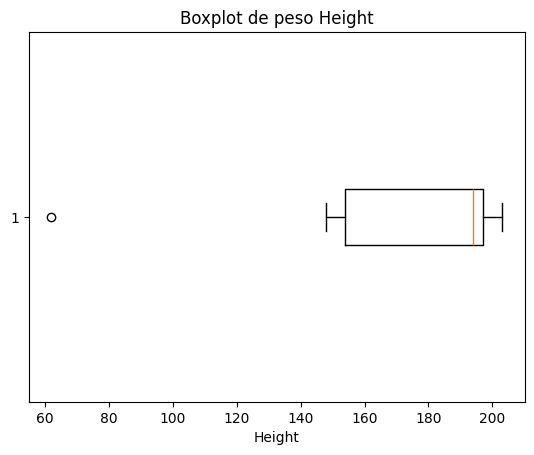

Numero de valores atípicos en Height: 24
Numero de registros despues de eliminar los valores atípicos: 986


In [28]:
#se obtiene la media
median = response_df['Height'].mean()

# se obtiene el rango minimo y maximo aceptable
Q1 = response_df['Height'].quantile(0.25)
Q3 = response_df['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = median - 1.5 * IQR
upper_bound = median + 1.5 * IQR

# se identifican los valores atipicos
outliers_height = response_df[(response_df['Height'] < lower_bound) | (response_df['Height'] > upper_bound)].copy()

# se prepara la gráfica Boxplot
plt.boxplot(outliers_height.Height.dropna(),vert=False)
plt.xlabel('Height')
plt.title('Boxplot de peso Height')
plt.show()

# se hace un nuevo elemento eliminanto los extrax
response_height_df_cleaned = response_df[~((response_df['Height'] < lower_bound) | (response_df['Height'] > upper_bound))].copy()
print(f"Numero de valores atípicos en Height: {len(outliers_height)}")
print(f"Numero de registros despues de eliminar los valores atípicos: {len(response_height_df_cleaned)}")

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [52]:
# Se calcula el BMI
response_df_cleaned['Height_m'] = response_df_cleaned['Height'] / 100
response_df_cleaned['BMI'] = response_df_cleaned['Weight'] / (response_df_cleaned['Height_m'] ** 2)

# Se identifican los outliers en BMI usando el método IQR
Q1_bmi = response_df_cleaned['BMI'].quantile(0.25)
Q3_bmi = response_df_cleaned['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

outliers_bmi = response_df_cleaned[(response_df_cleaned['BMI'] < lower_bound_bmi) | (response_df_cleaned['BMI'] > upper_bound_bmi)].copy()

print(f"Numero de encuestados atípicos segun su BMI: {len(outliers_bmi)}")

if len(outliers_bmi) > 0:
    print("\nEncuestados atípicos segun su BMI:")
    print(outliers_bmi[['Weight', 'Height_m', 'BMI']])
else:
    print("\nNo se encontraron encuestados atípicos segun su BMI.")

Numero de encuestados atípicos segun su BMI: 13

Encuestados atípicos segun su BMI:
     Weight  Height_m        BMI
42     90.0      1.70  31.141869
151   100.0      1.80  30.864198
156    97.0      1.77  30.961729
292   120.0      1.84  35.444234
357    96.0      1.79  29.961612
401    90.0      1.70  31.141869
612   110.0      1.72  37.182261
636    93.0      1.71  31.804658
715   111.0      1.83  33.145212
793   120.0      1.85  35.062089
796   113.0      1.89  31.634053
859   125.0      1.90  34.626039
973   120.0      1.75  39.183673


10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

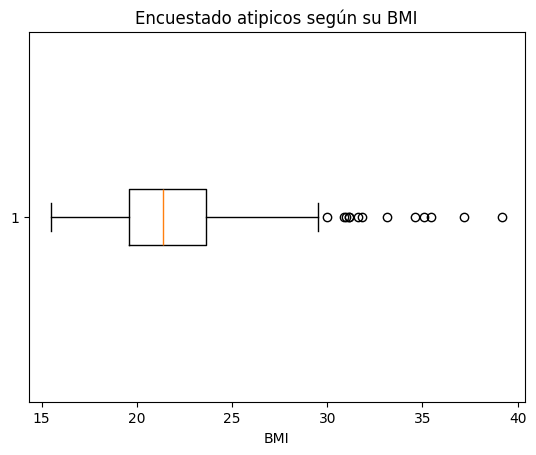

Los encuestados que estan fuera de su BMI es con tendencia hacia arriba


In [56]:
# Preparar el boxplot para BMI
plt.boxplot(response_df_cleaned['BMI'].dropna(), vert=False)
plt.xlabel('BMI')
plt.title('Encuestado atipicos según su BMI')
plt.show()

Comentario = 'Los encuestados que estan fuera de su BMI es con tendencia hacia arriba'
print(Comentario)